# COMP4211 Assignment 1

<p>Before we start the tasks, we import all the required modules</p>

In [1]:
# Required imports for all tasks
from __future__ import print_function
import numpy as np
import pandas as pd
import seaborn as sns
import scipy

# Imports for presentation
import matplotlib.pyplot as plt

# Import for splitting the data, if needed
from sklearn.model_selection import train_test_split

# To calculate R^2 score for linear regression
from sklearn import metrics

# Import libraries for linear regression
from sklearn.linear_model import LinearRegression

# Import libraries for Logistic Regression using gradient descent
from sklearn.linear_model import SGDClassifier

# Import libraries for single layer neural network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Import for accuracy for Logistic regression
from sklearn.metrics import accuracy_score

# Import for learning curve
from sklearn.model_selection import learning_curve

<br>
<p>
    Load the datasets given and assign them to variables.
</p>

In [2]:
# FIFA data
fifa = np.load('fifa.npz')

# Finance data
finance = np.load('finance.npz')

# Orbits data
orbits = np.load('orbits.npz')

<br>
<p>
    Set the figure size of each figure. For presentation purposes only.
</p>

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 4

sns.set()


<hr>

## Tasks
<br>
<p>According to from the assignment information sheet:</p>

<blockquote>
    The assignment consists of the following tasks:
    <ol>
        <li>To learn to use the linear regression model for regression.</li>
        <li>To learn to use the logistic regression model for classification.</li>
        <li>To learn to use the single-hidden-layer neural network model for classification.</li>
        <li>To conduct empirical study using different supervised learning methods.</li>
        <li>To write up a report.</li>
    </ol>
</blockquote>
<br>
<p>This means the NumPy arrays in each dataset has the following usages:</p>
<table align="left">
    <tr>
        <th>NumPy array</th>
        <th>Usage</th>
        <th>Task(s) concerned</th>
    </tr>
    <tr>
        <td>train_X</td>
        <td>Inputs for the training set</td>
        <td>Linear Regression, Logistic Regression, Neural Networks</td>
    </tr>
    <tr>
        <td>classification_train_Y</td>
        <td>Outputs for the training set for classification tasks</td>
        <td>Logistic Regression, Neural Networks</td>
    </tr>
    <tr>
        <td>regression_train_Y</td>
        <td>Outputs for the training set for regression tasks</td>
        <td>Linear Regression</td>
    </tr>
    <tr>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
        <td>&nbsp;</td>
    </tr>
    <tr>
        <td>test_X</td>
        <td>Inputs for the test set</td>
        <td>Linear Regression, Logistic Regression, Neural Networks</td>
    </tr>
    <tr>
        <td>classification_test_Y</td>
        <td>Outputs for the test set for classification tasks</td>
        <td>Logistic Regression, Neural Networks</td>
    </tr>
    <tr>
        <td>regression_test_Y</td>
        <td>Outputs for the test set for regression tasks</td>
        <td>Linear Regression</td>
    </tr>
</table>

<hr>

## Part 1 : Linear Regression

### Marking Scheme (Linear Regression Part only)

<table align="left">
    <tr>
        <th>
            Description
        </th>
        <th>
            Code
        </th>
        <th>
            Report
        </th>
    </tr>
    <tr>
        <td colspan="3"> <b>Empirical study on linear regression </b> </td>
    </tr>
    <tr>
        <td style="width:80%">Build the linear regression model</td>
        <td align="right">2</td>
        <td>&nbsp;</td>
    </tr>
    <tr>
        <td style="width:80%">Compute the R<sup>2</sup> score of the linear regression model on both the training and test sets</td>
        <td align="right">3</td>
        <td align="right">2</td>
    </tr>
     <tr>
        <td style="width:80%">Depict a histogram of the squared errors of the data points in the test set of the linear regression model </td>
        <td align="right">10</td>
        <td align="right">3</td>
    </tr>
</table>

#### Dataset 1: FIFA

<h5>Computation</h5>
<p>We first build the default Linear Regression model for FIFA dataset, by instantiating an object</p>

In [4]:
lin_regression_model_fifa = LinearRegression()

<p>We then fit the data with train_X and regression_train_Y .</p>

In [5]:
lin_regression_model_fifa.fit(fifa['train_X'],fifa['regression_train_Y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<p>Then we predict the model for both the training and test sets</p>

In [6]:
predictTrain_fifa = lin_regression_model_fifa.predict(fifa['train_X'])
predictTest_fifa = lin_regression_model_fifa.predict(fifa['test_X'])

We now compute the R<sup>2</sup> score for both the training and test sets

In [7]:
r2Train_fifa = metrics.r2_score(fifa['regression_train_Y'], predictTrain_fifa)
r2Test_fifa = metrics.r2_score(fifa['regression_test_Y'], predictTest_fifa)


print("Coefficient of determination for FIFA training set using linear regression: " + str(r2Train_fifa))
print("Coefficient of determination for FIFA test set using linear regression: " + str(r2Test_fifa))

Coefficient of determination for FIFA training set using linear regression: 0.8383726508683356
Coefficient of determination for FIFA test set using linear regression: 0.8422512700811537


We now compute the mean squared error for each data point in the test set, as the accuracy of the regression.
<code>metrics.mean_squared_error(predicted)</code> is used here.

In [8]:
mse_train_fifa = metrics.mean_squared_error(fifa['regression_train_Y'], predictTrain_fifa)
mse_test_fifa = metrics.mean_squared_error(fifa['regression_test_Y'], predictTest_fifa)

print("Mean squared error for FIFA training set using linear regression: " + str(mse_train_fifa))
print("Mean squared error for FIFA test set using linear regression: " + str(mse_test_fifa))

Mean squared error for FIFA training set using linear regression: 0.0033737004293163827
Mean squared error for FIFA test set using linear regression: 0.0033055440089010016


We now compute the squared error for each data point in the test set.
<p>
    We first calculate the linear error. This can be done by <code>np.subtract(predicted, actual)</code>
</p>
<p>
    Then we square each item to get the squared error. This is done by <code>np.square(array)</code>
</p>

In [9]:
# First calculate the linear error for each data point
linear_error_test_fifa = np.subtract(predictTest_fifa, fifa['regression_test_Y'])

# Square each error
squared_error_test_fifa = np.square(linear_error_test_fifa)

<h5>Visualize the results</h5>

<p>We first visualize the difference between the predicted dataset and the actual datasets (both training and test tests)</p>

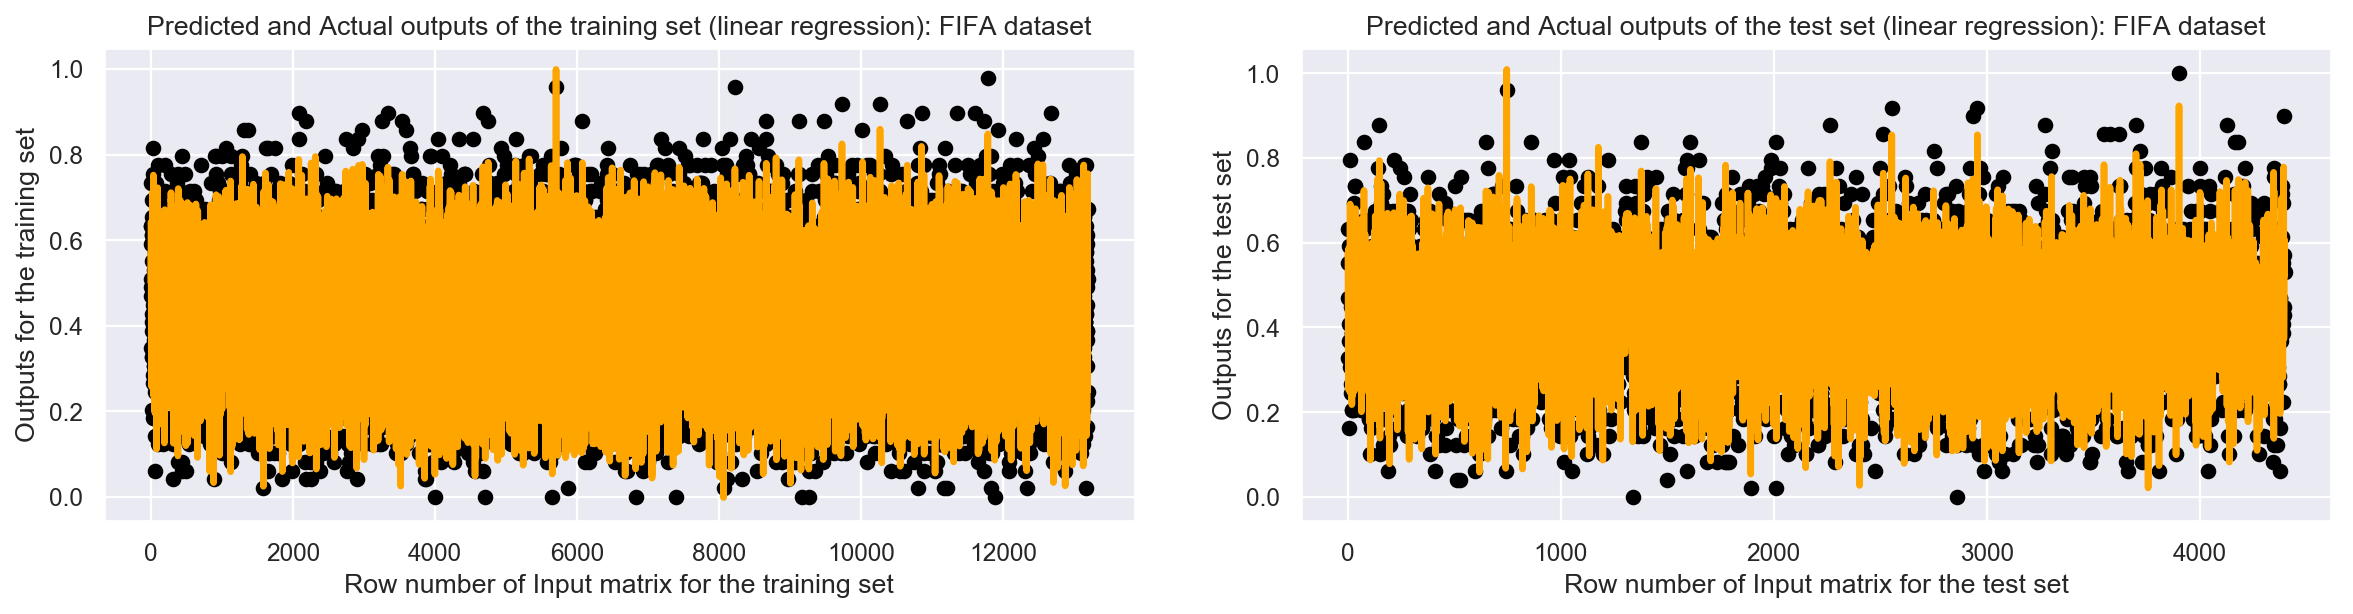

In [10]:
# As the inputs of the training set has 36 features, while it outputs one value, we need to visualize the X axis to be the number of rows of the inputs
num_rows_fifaTrainX, num_cols_fifaTrainX = fifa['train_X'].shape
Xaxis_fifaTrain = np.arange(1, num_rows_fifaTrainX + 1)

# Same for the test set
num_rows_fifaTestX, num_cols_fifaTestX = fifa['test_X'].shape
Xaxis_fifaTest = np.arange(1, num_rows_fifaTestX + 1)

# Set the size of figure
plt.figure(num=1, figsize=(15, 4), dpi=160, facecolor='w')

# Training set
plt.subplot(1,2,1)
plt.scatter(Xaxis_fifaTrain, 'regression_train_Y', data=fifa, color='black')
plt.plot(Xaxis_fifaTrain, predictTrain_fifa, color='orange', linewidth=3)
plt.xlabel("Row number of Input matrix for the training set")
plt.ylabel("Outputs for the training set")
plt.title("Predicted and Actual outputs of the training set (linear regression): FIFA dataset")

# Test set
plt.subplot(1,2,2)
plt.scatter(Xaxis_fifaTest, fifa['regression_test_Y'], color='black')
plt.plot(Xaxis_fifaTest, predictTest_fifa, color='orange',linewidth=3)
plt.xlabel("Row number of Input matrix for the test set")
plt.ylabel("Outputs for the test set")
plt.title("Predicted and Actual outputs of the test set (linear regression): FIFA dataset")

# adjust to prevent overlapping
plt.tight_layout()

plt.show()

<p>Then we visualize the histogram for the squared error of each data point</p>

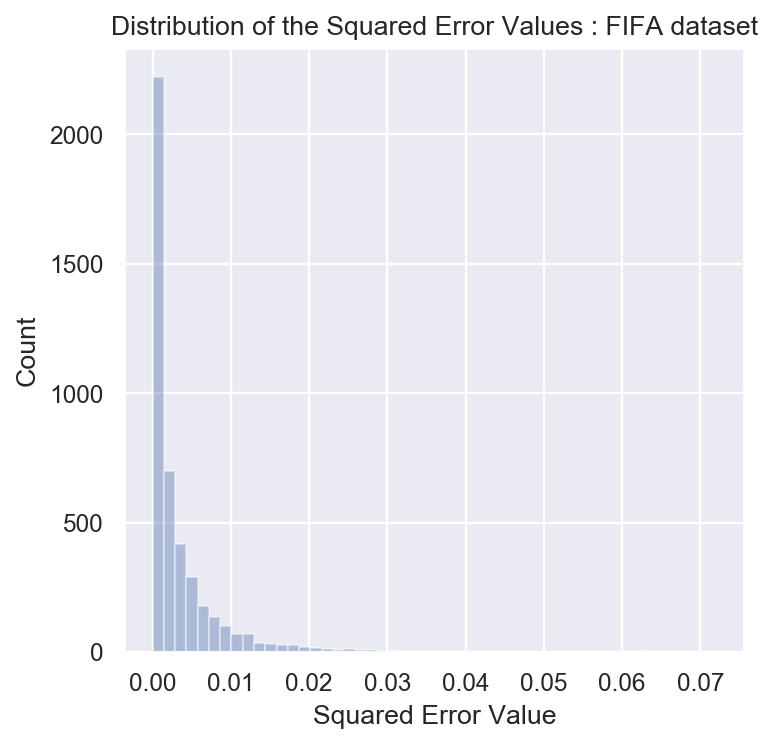

In [11]:
# Set the size of figure
plt.figure(num=None, figsize=(5, 5), dpi=160, facecolor='w')

sns.distplot(squared_error_test_fifa, hist=True, kde=False)

# Plot the histogram
plt.xlabel("Squared Error Value")
plt.ylabel("Count")
plt.title("Distribution of the Squared Error Values : FIFA dataset")
plt.show()

#### Dataset 2: finance

<h5>Computation</h5>
<p>We first build the default Linear Regression model for FINANCE dataset, by instantiating an object</p>

In [12]:
lin_regression_model_finance = LinearRegression()

<p>We then fit the data with train_X and regression_train_Y .</p>

In [13]:
lin_regression_model_finance.fit(finance['train_X'],finance['regression_train_Y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<p>Then we predict the model for both the training and test sets</p>

In [14]:
predictTrain_finance = lin_regression_model_finance.predict(finance['train_X'])
predictTest_finance = lin_regression_model_finance.predict(finance['test_X'])

We now compute the R<sup>2</sup> score for both the training and test sets

In [15]:
r2Train_finance = metrics.r2_score(finance['regression_train_Y'], predictTrain_finance)
r2Test_finance = metrics.r2_score(finance['regression_test_Y'], predictTest_finance)


print("Coefficient of determination for FINANCE training set (linear regression): " + str(r2Train_finance))
print("Coefficient of determination for FINANCE test set (linear regression): " + str(r2Test_finance))

Coefficient of determination for FINANCE training set (linear regression): 0.9999999994806468
Coefficient of determination for FINANCE test set (linear regression): 0.9999999994710106


We now compute the mean squared error for each data point in the test set, as the accuracy of the regression.
<code>metrics.mean_squared_error(predicted)</code> is used here.

In [16]:
mse_train_finance = metrics.mean_squared_error(finance['regression_train_Y'], predictTrain_finance)
mse_test_finance = metrics.mean_squared_error(finance['regression_test_Y'], predictTest_finance)

print("Mean squared error for FINANCE training set using linear regression: " + str(mse_train_finance))
print("Mean squared error for FINANCE test set using linear regression: " + str(mse_test_finance))

Mean squared error for FINANCE training set using linear regression: 9.557831781691407e-12
Mean squared error for FINANCE test set using linear regression: 9.462171020029864e-12


We now compute the squared error for each data point in the test set.
<p>
    We first calculate the linear error. This can be done by <code>np.subtract(predicted, actual)</code>
</p>
<p>
    Then we square each item to get the squared error. This is done by <code>np.square(array)</code>
</p>

In [17]:
# First calculate the linear error for each data point
linear_error_test_finance = np.subtract(predictTest_finance, finance['regression_test_Y'])

# Square each error
squared_error_test_finance = np.square(linear_error_test_finance)

<h5>Visualization of Results</h5>

<p>We first visualize the difference between the predicted dataset and the actual datasets (both training and test tests)</p>

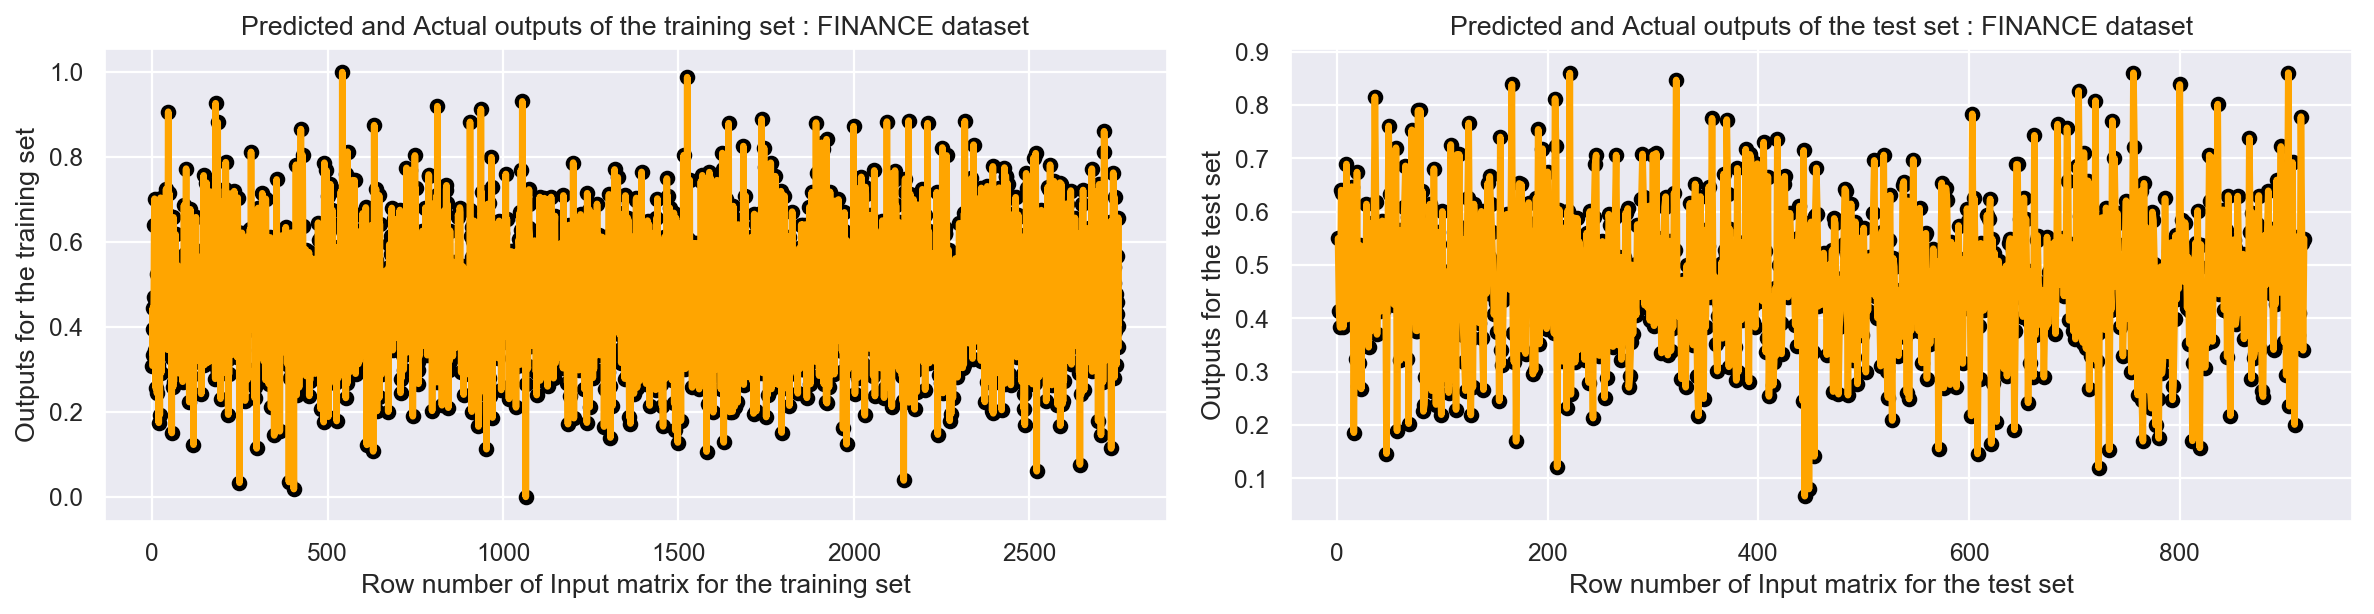

In [18]:
# As the inputs of the training set has 36 features, while it outputs one value, we need to visualize the X axis to be the number of rows of the inputs
num_rows_financeTrainX, num_cols_financeTrainX = finance['train_X'].shape
Xaxis_financeTrain = np.arange(1, num_rows_financeTrainX + 1)

# Same for the test set
num_rows_financeTestX, num_cols_financeTestX = finance['test_X'].shape
Xaxis_financeTest = np.arange(1, num_rows_financeTestX + 1)

# Set the size of figure
plt.figure(num=1, figsize=(15, 4), dpi=160, facecolor='w')

# Training set
plt.subplot(1,2,1)
plt.scatter(Xaxis_financeTrain, 'regression_train_Y', data=finance, color='black')
plt.plot(Xaxis_financeTrain, predictTrain_finance, color='orange', linewidth=3)
plt.xlabel("Row number of Input matrix for the training set")
plt.ylabel("Outputs for the training set")
plt.title("Predicted and Actual outputs of the training set : FINANCE dataset")

# Test set
plt.subplot(1,2,2)
plt.scatter(Xaxis_financeTest, finance['regression_test_Y'], color='black')
plt.plot(Xaxis_financeTest, predictTest_finance, color='orange',linewidth=3)
plt.xlabel("Row number of Input matrix for the test set")
plt.ylabel("Outputs for the test set")
plt.title("Predicted and Actual outputs of the test set : FINANCE dataset")

# adjust to prevent overlapping
plt.tight_layout()

plt.show()

<p>Then we visualize the histogram for the squared error of each data point</p>

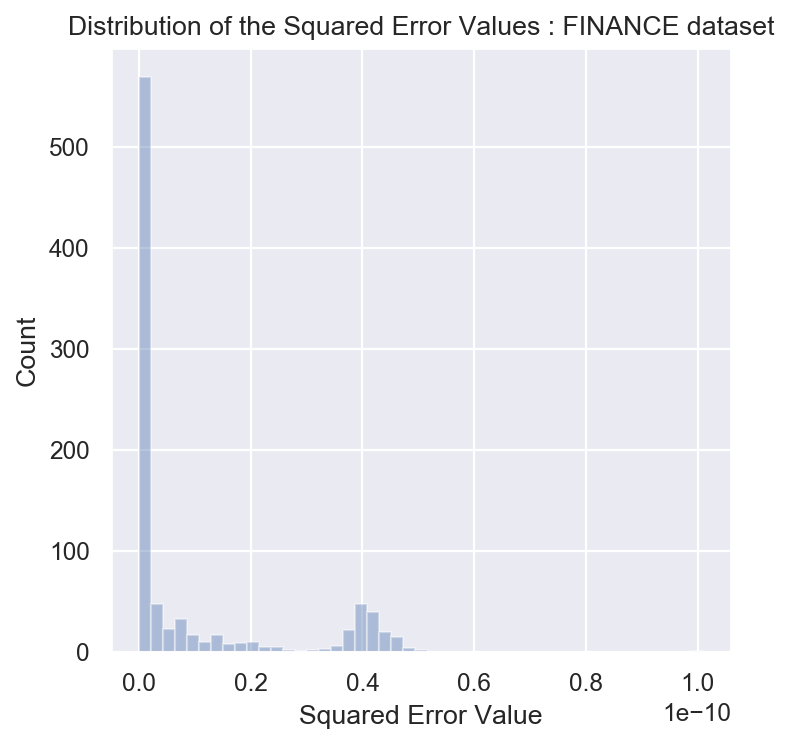

In [ ]:
# Set the size of figure
plt.figure(num=None, figsize=(5, 5), dpi=160, facecolor='w')

sns.distplot(squared_error_test_finance, hist=True, kde=False)

# Plot the histogram
plt.ticklabel_format(style='scientific', axis='x', scilimits=(0,0))
plt.xlabel("Squared Error Value")
plt.ylabel("Count")
plt.title("Distribution of the Squared Error Values : FINANCE dataset")


plt.show()

#### Dataset 3 : Orbits

<h5>Computation</h5>
<p>We first build the default Linear Regression model for ORBITS dataset, by instantiating an object</p>

In [ ]:
lin_regression_model_orbits = LinearRegression()

<p>We then fit the data with train_X and regression_train_Y .</p>

In [ ]:
lin_regression_model_orbits.fit(orbits['train_X'],orbits['regression_train_Y'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<p>Then we predict the model for both the training and test sets</p>

In [ ]:
predictTrain_orbits = lin_regression_model_orbits.predict(orbits['train_X'])
predictTest_orbits = lin_regression_model_orbits.predict(orbits['test_X'])

We now compute the R<sup>2</sup> score for both the training and test sets

In [ ]:
r2Train_orbits = metrics.r2_score(orbits['regression_train_Y'], predictTrain_orbits)
r2Test_orbits = metrics.r2_score(orbits['regression_test_Y'], predictTest_orbits)


print("Coefficient of determination for ORBITS training set: " + str(r2Train_orbits))
print("Coefficient of determination for ORBITS test set: " + str(r2Test_orbits))

Coefficient of determination for ORBITS training set: 0.6862642136934252
Coefficient of determination for ORBITS test set: 0.6950418243915277


We now compute the mean squared error for each data point in the test set, as the accuracy of the regression.
<code>metrics.mean_squared_error(predicted)</code> is used here.

In [ ]:
mse_train_orbits = metrics.mean_squared_error(orbits['regression_train_Y'], predictTrain_orbits)
mse_test_orbits = metrics.mean_squared_error(orbits['regression_test_Y'], predictTest_orbits)

print("Mean squared error for ORBITS training set using linear regression: " + str(mse_train_orbits))
print("Mean squared error for ORBITS test set using linear regression: " + str(mse_test_orbits))

Mean squared error for ORBITS training set using linear regression: 0.005115185164058071
Mean squared error for ORBITS test set using linear regression: 0.004999975214856764


We now compute the squared error for each data point in the test set.
<p>
    We first calculate the linear error. This can be done by <code>np.subtract(predicted, actual)</code>
</p>
<p>
    Then we square each item to get the squared error. This is done by <code>np.square(array)</code>
</p>

In [ ]:
# First calculate the linear error for each data point
linear_error_test_orbits = np.subtract(predictTest_orbits, orbits['regression_test_Y'])

# Square each error
squared_error_test_orbits = np.square(linear_error_test_orbits)

<h5>Visualization of Results</h5>

<p>We first visualize the difference between the predicted dataset and the actual datasets (both training and test tests)</p>

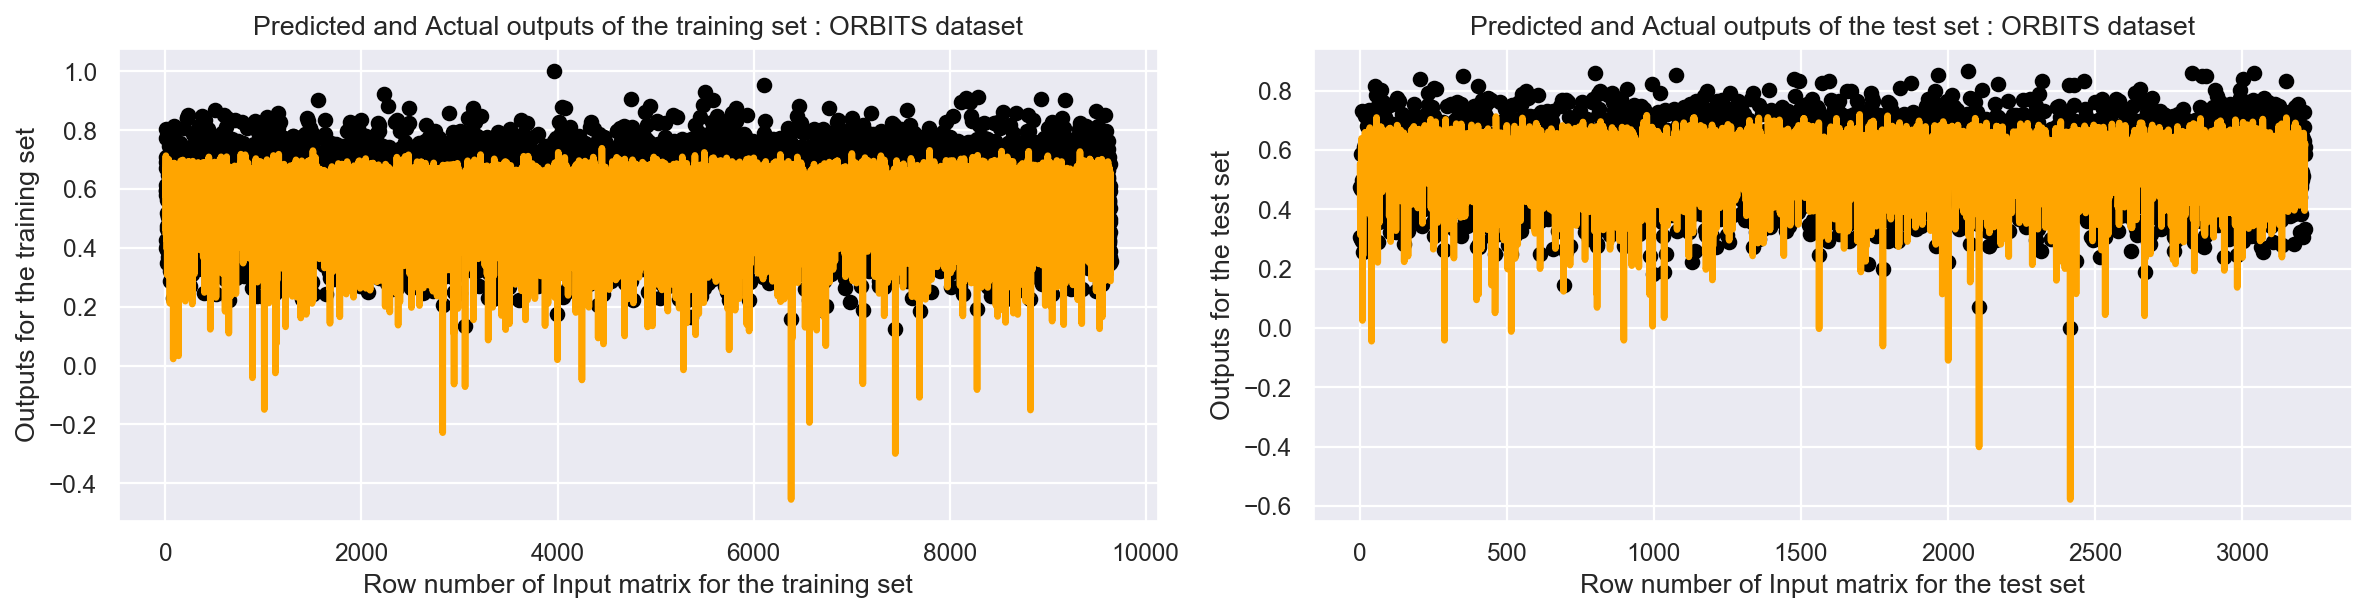

In [ ]:
# As the inputs of the training set has 36 features, while it outputs one value, we need to visualize the X axis to be the number of rows of the inputs
num_rows_orbitsTrainX, num_cols_orbitsTrainX = orbits['train_X'].shape
Xaxis_orbitsTrain = np.arange(1, num_rows_orbitsTrainX + 1)

# Same for the test set
num_rows_orbitsTestX, num_cols_orbitsTestX = orbits['test_X'].shape
Xaxis_orbitsTest = np.arange(1, num_rows_orbitsTestX + 1)

# Set the size of figure
plt.figure(num=1, figsize=(15, 4), dpi=160, facecolor='w')

# Training set
plt.subplot(1,2,1)
plt.scatter(Xaxis_orbitsTrain, 'regression_train_Y', data=orbits, color='black')
plt.plot(Xaxis_orbitsTrain, predictTrain_orbits, color='orange', linewidth=3)
plt.xlabel("Row number of Input matrix for the training set")
plt.ylabel("Outputs for the training set")
plt.title("Predicted and Actual outputs of the training set : ORBITS dataset")

# Test set
plt.subplot(1,2,2)
plt.scatter(Xaxis_orbitsTest, orbits['regression_test_Y'], color='black')
plt.plot(Xaxis_orbitsTest, predictTest_orbits, color='orange',linewidth=3)
plt.xlabel("Row number of Input matrix for the test set")
plt.ylabel("Outputs for the test set")
plt.title("Predicted and Actual outputs of the test set : ORBITS dataset")

# adjust to prevent overlapping
plt.tight_layout()

plt.show()

<p>Then we visualize the histogram for the squared error of each data point</p>

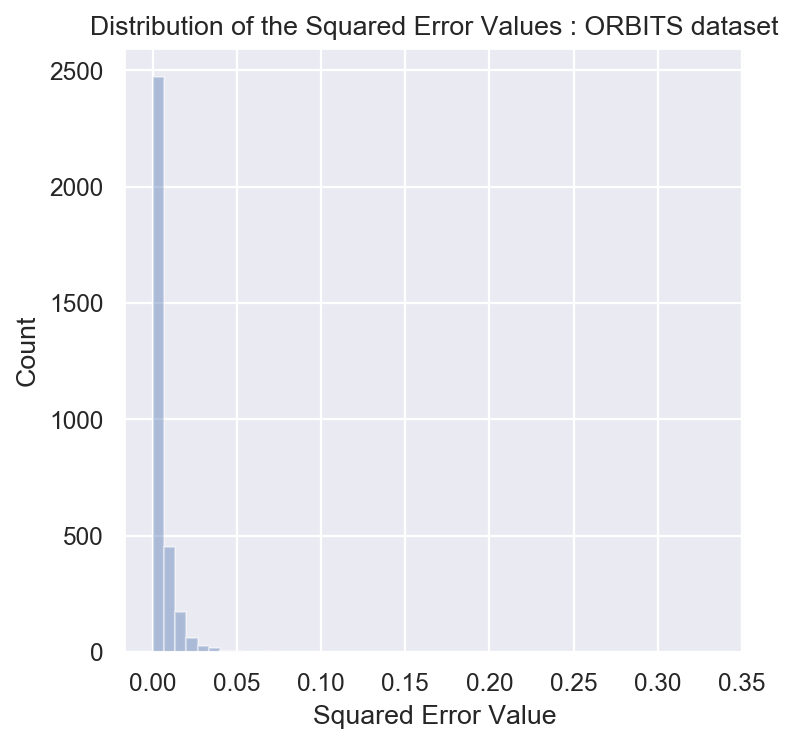

In [ ]:
# Set the size of figure
plt.figure(num=None, figsize=(5, 5), dpi=160, facecolor='w')

sns.distplot(squared_error_test_orbits, hist=True, kde=False)

# Plot the histogram
plt.xlabel("Squared Error Value")
plt.ylabel("Count")
plt.title("Distribution of the Squared Error Values : ORBITS dataset")


plt.show()

<hr>

## Task 2 : Logistic Regression

### Marking Scheme (Logistic Regression Part only)

<table align="left">
    <tr>
        <th>
            Description
        </th>
        <th>
            Code
        </th>
        <th>
            Report
        </th>
    </tr>
    <tr>
        <td colspan="3"> <b>Empirical study on logistic regression </b> </td>
    </tr>
    <tr>
        <td style="width:80%">Build the logistic regression model by adopting the gradient descent optimization algorithm, and present the model settings</td>
        <td align="right">5</td>
        <td align="right">+2</td>
    </tr>
    <tr>
        <td style="width:80%">Compute the accuracy of the logistic regression model on both the training and test sets</td>
        <td align="right">5</td>
        <td align="right">+3</td>
    </tr>
     <tr>
        <td style="width:80%">Record and visualize the experiment results of the logistic regression model on both the training and test sets </td>
        <td align="right">10</td>
        <td align="right">+3</td>
    </tr>
</table>

Define a function that plots the confusion matrix to visualize the experimental results.

In [ ]:
# Plots the confusion matrix
# @param cm - the confusion matrix
# @param title - the title of the metrix
# @param score - the accuracy score of the logistic regression
# @return an pyplot instance containing the drawn figure
def plot_conf_matrix(cm, title, score):
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    title += ', Accuracy Score: {:.4f}'.format(score) 
    plt.title(title, size = 15);
    plt.show()
    return plt

#### Dataset 1: FIFA

<h5>Computation</h5>
<p>We first build the Logistic Regression model for FIFA dataset, by instantiating an object with SGDClassifier</p>

In [ ]:
clf_sgd_fifa = SGDClassifier(loss = 'log', max_iter = 1000, tol= 1e-3, verbose=1, learning_rate='adaptive', eta0=0.9, early_stopping=True)

We then fit the model based on the data

In [ ]:
clf_sgd_fifa.fit(fifa['train_X'], fifa['classification_train_Y'])

-- Epoch 1
Norm: 38.57, NNZs: 36, Bias: 3.923976, T: 11871, Avg. loss: 0.919555
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 38.53, NNZs: 36, Bias: 1.465178, T: 23742, Avg. loss: 0.865314
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 38.84, NNZs: 36, Bias: 2.232553, T: 35613, Avg. loss: 0.855419
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 38.94, NNZs: 36, Bias: 1.272699, T: 47484, Avg. loss: 0.869297
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 39.75, NNZs: 36, Bias: 1.580232, T: 59355, Avg. loss: 0.856838
Total training time: 0.03 seconds.
-- Epoch 6
Norm: 38.26, NNZs: 36, Bias: 1.662399, T: 71226, Avg. loss: 0.832924
Total training time: 0.03 seconds.
-- Epoch 7
Norm: 25.39, NNZs: 36, Bias: 1.034666, T: 83097, Avg. loss: 0.380270
Total training time: 0.04 seconds.
-- Epoch 8
Norm: 20.69, NNZs: 36, Bias: 1.062400, T: 94968, Avg. loss: 0.344824
Total training time: 0.04 seconds.
-- Epoch 9
Norm: 19.08, NNZs: 36, Bias: 1.027374, T: 106839, Avg. loss: 0.342375

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=True, epsilon=0.1, eta0=0.9, fit_intercept=True,
       l1_ratio=0.15, learning_rate='adaptive', loss='log', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=1, warm_start=False)

We then predict the training set and the test sets, separately.

In [ ]:
predict_train_fifa = clf_sgd_fifa.predict(fifa['train_X'])
predict_test_fifa = clf_sgd_fifa.predict(fifa['test_X'])

Finally, we obtain the accuracy score using <code>SGDClassifier.score(X, y)</code>

In [ ]:
clf_sgd_fifa_train_score = clf_sgd_fifa.score(fifa['train_X'], fifa['classification_train_Y'])
clf_sgd_fifa_test_score = clf_sgd_fifa.score(fifa['test_X'], fifa['classification_test_Y'])

print("Accuracy for Logistic Regression with Stochastic Gradient Descent, FIFA training set: " + str(clf_sgd_fifa_train_score))
print("Accuracy for Logistic Regression with Stochastic Gradient Descent, FIFA test set: " + str(clf_sgd_fifa_test_score))

Accuracy for Logistic Regression with Stochastic Gradient Descent, FIFA training set: 0.8622545675081495
Accuracy for Logistic Regression with Stochastic Gradient Descent, FIFA test set: 0.85672049124403


<h5>Visualization of Results</h5>

<p>We use a confusion matrix to visualize the results for the FIFA dataset.</p>

<p>Firstly, set up the confusion matrices by manipulating it with the training and test data.</p>

In [ ]:
cm_training_fifa = metrics.confusion_matrix(fifa['classification_train_Y'], predict_train_fifa)
cm_test_fifa = metrics.confusion_matrix(fifa['classification_test_Y'], predict_test_fifa)

The following are the normalized confusion matrices. 

In [ ]:
cm_normalized_training_fifa = cm_training_fifa.astype('float') / cm_training_fifa.sum(axis=1)[:, np.newaxis]
cm_normalized_test_fifa = cm_test_fifa.astype('float') / cm_test_fifa.sum(axis=1)[:, np.newaxis]

We now plot both confusion matrices.

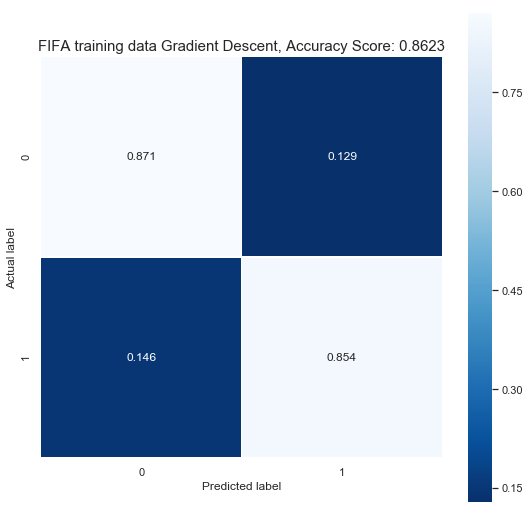

In [ ]:
plt_train_fifa = plot_conf_matrix(cm_normalized_training_fifa, "FIFA training data Gradient Descent", clf_sgd_fifa_train_score)

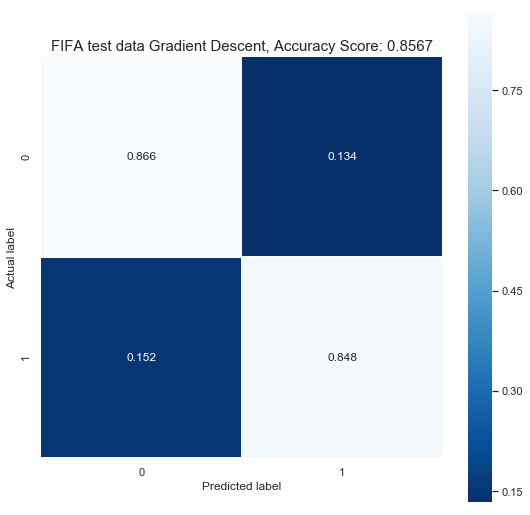

In [ ]:
plt_test_fifa = plot_conf_matrix(cm_normalized_test_fifa, "FIFA test data Gradient Descent", clf_sgd_fifa_test_score)

#### Dataset 2: FINANCE

<h5>Computation</h5>
<p>We first build the Logistic Regression model for FINANCE dataset, by instantiating an object with SGDClassifier</p>

In [ ]:
clf_sgd_finance = SGDClassifier(loss = 'log', max_iter = 1000, tol= 1e-3, verbose=1, learning_rate='adaptive', eta0=0.9, early_stopping=True)

We then fit the model based on the data

In [ ]:
clf_sgd_finance.fit(finance['train_X'], finance['classification_train_Y'])

-- Epoch 1
Norm: 24.17, NNZs: 26, Bias: -8.125988, T: 2478, Avg. loss: 0.934645
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 29.02, NNZs: 26, Bias: -11.715275, T: 4956, Avg. loss: 0.789717
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 30.81, NNZs: 26, Bias: -12.747116, T: 7434, Avg. loss: 0.771781
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 31.52, NNZs: 26, Bias: -14.308795, T: 9912, Avg. loss: 0.768080
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 33.41, NNZs: 26, Bias: -13.919285, T: 12390, Avg. loss: 0.776515
Total training time: 0.01 seconds.
-- Epoch 6
Norm: 32.80, NNZs: 26, Bias: -15.551576, T: 14868, Avg. loss: 0.799952
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 30.65, NNZs: 26, Bias: -14.803904, T: 17346, Avg. loss: 0.434762
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 29.07, NNZs: 26, Bias: -14.167105, T: 19824, Avg. loss: 0.416019
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 27.79, NNZs: 26, Bias: -13.589701, T: 22302, Avg. lo

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=True, epsilon=0.1, eta0=0.9, fit_intercept=True,
       l1_ratio=0.15, learning_rate='adaptive', loss='log', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=1, warm_start=False)

We then predict the training set and the test sets, separately.

In [ ]:
predict_train_finance = clf_sgd_finance.predict(finance['train_X'])
predict_test_finance = clf_sgd_finance.predict(finance['test_X'])

Finally, we obtain the accuracy score using <code>SGDClassifier.score(X, y)</code>

In [ ]:
clf_sgd_finance_train_score = clf_sgd_finance.score(finance['train_X'], finance['classification_train_Y'])
clf_sgd_finance_test_score = clf_sgd_finance.score(finance['test_X'], finance['classification_test_Y'])

print("Accuracy for Logistic Regression with Stochastic Gradient Descent, FINANCE training set: " + str(clf_sgd_finance_train_score))
print("Accuracy for Logistic Regression with Stochastic Gradient Descent, FINANCE test set: " + str(clf_sgd_finance_test_score))

Accuracy for Logistic Regression with Stochastic Gradient Descent, FINANCE training set: 0.826797385620915
Accuracy for Logistic Regression with Stochastic Gradient Descent, FINANCE test set: 0.8028322440087146


<h5>Visualization of Results</h5>

<p>We use a confusion matrix to visualize the results for the FINANCE dataset.</p>

<p>Firstly, set up the confusion matrices by manipulating it with the training and test data.</p>

In [ ]:
cm_training_finance = metrics.confusion_matrix(finance['classification_train_Y'], predict_train_finance)
cm_test_finance = metrics.confusion_matrix(finance['classification_test_Y'], predict_test_finance)

The following are the normalized confusion matrices. 

In [ ]:
cm_normalized_training_finance = cm_training_finance.astype('float') / cm_training_finance.sum(axis=1)[:, np.newaxis]
cm_normalized_test_finance = cm_test_finance.astype('float') / cm_test_finance.sum(axis=1)[:, np.newaxis]

We now plot both confusion matrices.

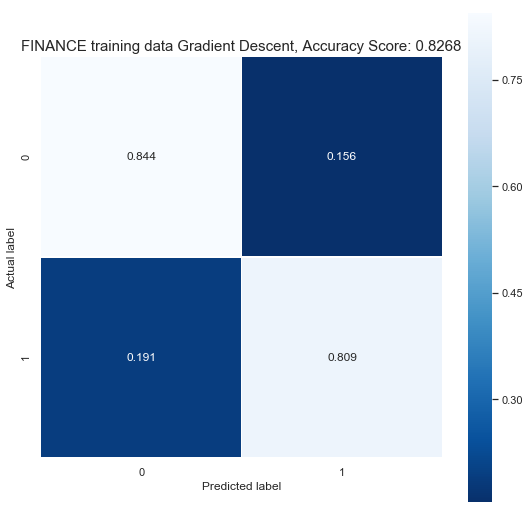

In [ ]:
plt_train_finance = plot_conf_matrix(cm_normalized_training_finance, "FINANCE training data Gradient Descent", clf_sgd_finance_train_score)

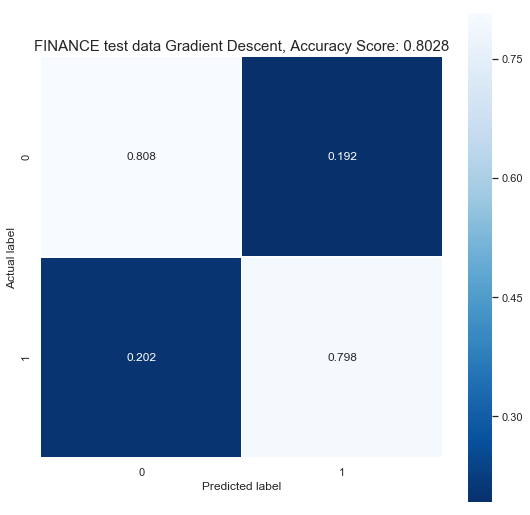

In [ ]:
plt_test_finance = plot_conf_matrix(cm_normalized_test_finance, "FINANCE test data Gradient Descent", clf_sgd_finance_test_score)

#### Dataset 3: ORBITS

<h5>Computation</h5>
<p>We first build the Logistic Regression model for ORBITS dataset, by instantiating an object with SGDClassifier</p>

In [ ]:
clf_sgd_orbits = SGDClassifier(loss = 'log', max_iter = 1000, tol= 1e-3, verbose=1, learning_rate='adaptive', eta0=0.9, early_stopping=True)

We then fit the model based on the data

In [ ]:
clf_sgd_orbits.fit(orbits['train_X'], orbits['classification_train_Y'])

-- Epoch 1
Norm: 29.88, NNZs: 12, Bias: 21.597964, T: 8677, Avg. loss: 0.220865
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 32.72, NNZs: 12, Bias: 24.411388, T: 17354, Avg. loss: 0.160543
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 34.61, NNZs: 12, Bias: 24.911972, T: 26031, Avg. loss: 0.156724
Total training time: 0.01 seconds.
-- Epoch 4
Norm: 35.16, NNZs: 12, Bias: 25.240507, T: 34708, Avg. loss: 0.150899
Total training time: 0.01 seconds.
-- Epoch 5
Norm: 34.76, NNZs: 12, Bias: 26.404303, T: 43385, Avg. loss: 0.152452
Total training time: 0.02 seconds.
-- Epoch 6
Norm: 35.19, NNZs: 12, Bias: 25.348222, T: 52062, Avg. loss: 0.152749
Total training time: 0.02 seconds.
-- Epoch 7
Norm: 34.02, NNZs: 12, Bias: 25.339873, T: 60739, Avg. loss: 0.117791
Total training time: 0.02 seconds.
-- Epoch 8
Norm: 33.39, NNZs: 12, Bias: 25.060875, T: 69416, Avg. loss: 0.119607
Total training time: 0.02 seconds.
-- Epoch 9
Norm: 32.96, NNZs: 12, Bias: 24.850880, T: 78093, Avg. loss: 0

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=True, epsilon=0.1, eta0=0.9, fit_intercept=True,
       l1_ratio=0.15, learning_rate='adaptive', loss='log', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=1, warm_start=False)

We then predict the training set and the test sets, separately.

In [ ]:
predict_train_orbits = clf_sgd_orbits.predict(orbits['train_X'])
predict_test_orbits = clf_sgd_orbits.predict(orbits['test_X'])

Finally, we obtain the accuracy score using <code>SGDClassifier.score(X, y)</code>

In [ ]:
clf_sgd_orbits_train_score = clf_sgd_orbits.score(orbits['train_X'], orbits['classification_train_Y'])
clf_sgd_orbits_test_score = clf_sgd_orbits.score(orbits['test_X'], orbits['classification_test_Y'])

print("Accuracy for Logistic Regression with Stochastic Gradient Descent, ORBITS training set: " + str(clf_sgd_orbits_train_score))
print("Accuracy for Logistic Regression with Stochastic Gradient Descent, ORBITS test set: " + str(clf_sgd_orbits_test_score))

Accuracy for Logistic Regression with Stochastic Gradient Descent, ORBITS training set: 0.9706492428956648
Accuracy for Logistic Regression with Stochastic Gradient Descent, ORBITS test set: 0.9698289269051322


<h5>Visualization of Results</h5>

<p>We use a confusion matrix to visualize the results for the ORBITS dataset.</p>

<p>Firstly, set up the confusion matrices by manipulating it with the training and test data.</p>

In [ ]:
cm_training_orbits = metrics.confusion_matrix(orbits['classification_train_Y'], predict_train_orbits)
cm_test_orbits = metrics.confusion_matrix(orbits['classification_test_Y'], predict_test_orbits)

The following are the normalized confusion matrices. 

In [ ]:
cm_normalized_training_orbits = cm_training_orbits.astype('float') / cm_training_orbits.sum(axis=1)[:, np.newaxis]
cm_normalized_test_orbits = cm_test_orbits.astype('float') / cm_test_orbits.sum(axis=1)[:, np.newaxis]

We now plot both confusion matrices.

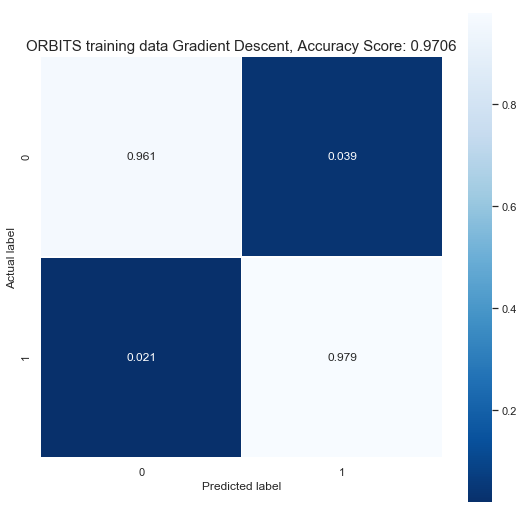

In [ ]:
plt_train_orbits = plot_conf_matrix(cm_normalized_training_orbits, "ORBITS training data Gradient Descent", clf_sgd_orbits_train_score)

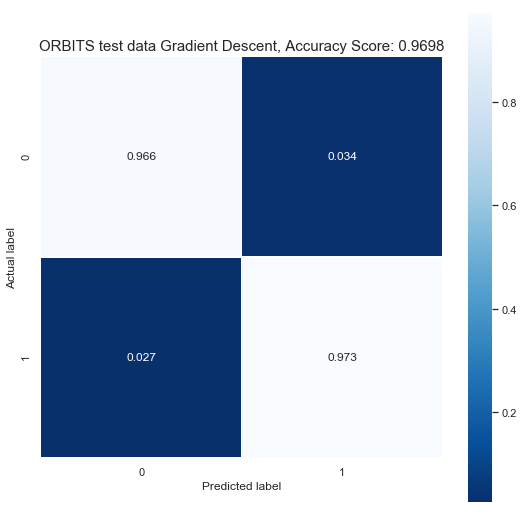

In [ ]:
plt_test_orbits = plot_conf_matrix(cm_normalized_test_orbits, "ORBITS test data Gradient Descent", clf_sgd_orbits_test_score)

<hr>

## Task 3 : Single-hidden-layer Neural Networks

### Marking Scheme (Single-hidden-layer NN Part only)

<table align="left">
    <tr>
        <th>
            Description
        </th>
        <th>
            Code
        </th>
        <th>
            Report
        </th>
    </tr>
    <tr>
        <td colspan="3"> <b>Empirical study on neural network model</b> </td>
    </tr>
    <tr>
        <td style="width:80%">Build the neural network model by adopting the gradient descent optimization algorithm, and present the model settings</td>
        <td align="right">5</td>
        <td align="right">+2</td>
    </tr>
    <tr>
        <td style="width:80%">Report the parameter tuning results of the neural network model using cross validation</td>
        <td align="right">5</td>
        <td align="right">+4</td>
    </tr>
     <tr>
        <td style="width:80%">Compute the best (i.e., lowest) loss of the neural network model on both the training and test sets before the model is overfitted</td>
        <td align="right">5</td>
        <td align="right">+3</td>
    </tr>
    <tr>
        <td style="width:80%">Record and visualize the experiment results of the neural network model, including performance change over <b>time</b></td>
        <td align="right">10</td>
        <td align="right">+3</td>
    </tr>
</table>

We first define a function that builds the neural network model based on human made parameters

In [ ]:
"""
    Creates a new single layer neural network model
    
    @param hidden_units : The number of hidden units in the hidden layer
    @param learning_rate_init : The initial learning rate used. It controls the step-size in updating the weights.
    
    @return a new instance of the model
"""

def create_single_layer_classifier(hidden_units, learning_rate, learning_rate_init):
    return MLPClassifier(hidden_layer_sizes=(hidden_units, ), activation='logistic', solver='sgd', learning_rate=learning_rate, learning_rate_init=learning_rate_init, verbose=True, early_stopping=True, validation_fraction=0.2)

<p>As we are required to obtain the parameter tuning results of the neural network model, we define a function for hyperparameter tuning.</p>
<p>First, define a function that obtains the tuning hyperparameters.</p>

In [ ]:
"""
    Creates a new set of parameters based on the number of units in the single layered NN model
    
    @param max_hidden_unit_count = 10 : The maximum number or hidden units in a layer
"""
def set_tuned_parameters(max_hidden_unit_count = 10):
    tuned_parameters = []
    
    for i in range (1 , max_hidden_unit_count + 1):
        tuned_parameters.append({'hidden_layer_sizes': [(i,)]})
                
    return tuned_parameters

Then we make a function for hyperparameter tuning.

In [ ]:
"""
    Creates a function for hyperparameter tuning.
    
    @param X : The inputs (and features) for the training and validation set combined
    @param y : The outputs (and features) for the training and validation set combined
    @param validation_set_fraction : The fraction of the validation set. This must be a float in the interval [0,1)
    @param name : The name of the dataset, used for printing only.
    
    @return : The classifier object after tuning
"""
def hyperparameter_tuning(X, y, validation_set_fraction = 0.2, name=""):
    # Split the dataset in two parts
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_set_fraction, random_state=0)

    # Set the parameters by cross-validation
    tuned_parameters = set_tuned_parameters(max_hidden_unit_count = 10)

    scores = ['neg_log_loss']

    for score in scores:
        print("# Tuning hyper-parameters for %s" % score)
        print()
        
        # We set the initial learning rate to be 0.9, and gradually decrease it when it approaches the optimal point in the loss function.
        mlp =MLPClassifier(max_iter=1000, alpha=1e-4, solver='sgd', verbose=True, tol=1e-4, learning_rate = 'adaptive', learning_rate_init=0.9, random_state=1)
        clf = GridSearchCV(mlp, tuned_parameters, cv=5, scoring= score)
        clf.fit(X_train, y_train)

        print("Best parameters set found on development set for " + name + " : ")
        print()
        print(clf.best_params_)
        print()
        print("Grid scores on development set for " + name + " : ")
        print()
        means = clf.cv_results_['mean_test_score']
        stds = clf.cv_results_['std_test_score']
        for mean, std, params in zip(means, stds, clf.cv_results_['params']):
            print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
        print()

        print("Detailed classification report for " + name + " : ")
        print()
        print("The model is trained on the full development set.")
        print("The scores are computed on the full evaluation set.")
        print()
        y_true, y_pred = y_test, clf.predict(X_test)
        print(metrics.classification_report(y_true, y_pred))
        print()
        
        return clf

#### Visualization of Results

<p>We need visualization functions to visualize the results of the neural network.</p>
<br>
<p>We need two graphical aids:
    <ol>
        <li>The learning curve, with the training and cross-validation errors against the number of samples.</li>
        <li>The confusion matrix for classification. This is the same as the one we did on the previous logistic regression task.</li>
    </ol>
</p>
<p>Note that the number of samples is proportional to the training and validation time, i.e. the training and validation is in O(n) time, as the number of weights are constant.</p>

In [ ]:
"""
    Plots the learning curve against samples, using the training error and the Cross-validation Error.
    
    @param estimator : the classifier that was used for training.
    @param title : the title of the figure of the learning curve
    @param X : The training input.
    @param y : The expected training output.
    
    @return : the pyplot instance of the learning curve.
"""
def plot_learning_curve(estimator, title, X, y):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training samples")
    plt.ylabel("Error")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, scoring = 'neg_log_loss', cv=5, train_sizes=np.linspace(0.01,1, 100))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training error")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation error")

    plt.legend(loc="best")
    return plt

In [ ]:
"""
    Plots the confusion matrix to visualize the results.
    
    This is ALREADY DEFINED in the previous logistic regression task.
    A copy is here for reference.

def plot_conf_matrix(cm, title, score):
    
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    title += ', Accuracy Score: {:.4f}'.format(score) 
    plt.title(title, size = 15);
    plt.show()
    return plt
    
"""

'\n    Plots the confusion matrix to visualize the results.\n    \n    This is ALREADY DEFINED in the previous logistic regression task.\n    A copy is here for reference.\n\ndef plot_conf_matrix(cm, title, score):\n    \n    plt.figure(figsize=(9,9))\n    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = \'Blues_r\');\n    plt.ylabel(\'Actual label\');\n    plt.xlabel(\'Predicted label\');\n    title += \', Accuracy Score: {:.4f}\'.format(score) \n    plt.title(title, size = 15);\n    plt.show()\n    return plt\n    \n'

#### Task Function

<p>We now create a function for the overall workflow of the computation.</p>

In [ ]:
"""
    Performs the neural network task.
    
    @param dataset : the dataset used.
    @param name : the name of the dataset. Used for I/O only.
    
"""
def do_single_layer_neural_network(dataset, name):
    
    # search by hyperparameter and cross validation
    cls = hyperparameter_tuning(X = dataset['train_X'], y = dataset['classification_train_Y'], name=name)
    
    # Predict the training sets 
    predict_train = cls.predict(dataset['train_X'])
    predict_test = cls.predict(dataset['test_X'])
    
    # Obtains the log-loss for both datasets
    log_loss_train = metrics.log_loss(dataset['classification_train_Y'], predict_train)
    log_loss_test = metrics.log_loss(dataset['classification_test_Y'], predict_test)
    
    print("Cross-entropy loss for "+ name +" training data set, Neural Networks model = " + str(log_loss_train))
    print("Cross-entropy loss for "+ name +" test data set, Neural Networks model = " + str(log_loss_test))
    
    # Compute the best log-loss as the minimum of both log-losses
    best_loss = min(log_loss_train, log_loss_test)
    
    print("Hence, the best loss for "+ name +" data set using Neural Networks model = " + str(best_loss))
    
    # Plot the learning curve for training and validation sets, to visualize the performance over number of samples (time)
    plot_learning_curve(cls, name + " dataset learning curve, Neural Networks model", dataset['train_X'], dataset['classification_train_Y'])
    
    # Plot the normalized confusion matrix
    cm_training = metrics.confusion_matrix(dataset['classification_train_Y'], predict_train)
    cm_test = metrics.confusion_matrix(dataset['classification_test_Y'], predict_test)
    
    cm_normalized_training = cm_training.astype('float') / cm_training.sum(axis=1)[:, np.newaxis]
    cm_normalized_test = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]
    
    cls_train_score = cls.score(dataset['train_X'], dataset['classification_train_Y'])
    cls_test_score = cls.score(dataset['test_X'], dataset['classification_test_Y'])
    
    plot_conf_matrix(cm_normalized_training, name + " training set, Neural Networks", cls_train_score)
    plot_conf_matrix(cm_normalized_test, name + " test set, Neural Networks", cls_test_score)
    
    return

#### Dataset 1: FIFA

In [ ]:
do_single_layer_neural_network(fifa, "FIFA")

# Tuning hyper-parameters for neg_log_loss

Iteration 1, loss = 0.65873539
Iteration 2, loss = 0.63765469
Iteration 3, loss = 0.63813081
Iteration 4, loss = 0.63736604
Iteration 5, loss = 0.63706262
Iteration 6, loss = 0.63527254
Iteration 7, loss = 0.63651515
Iteration 8, loss = 0.63432971
Iteration 9, loss = 0.63371456
Iteration 10, loss = 0.64378052
Iteration 11, loss = 0.63450054
Iteration 12, loss = 0.63418699
Iteration 13, loss = 0.63436954
Iteration 14, loss = 0.63439676
Iteration 15, loss = 0.63515566
Iteration 16, loss = 0.63319931
Iteration 17, loss = 0.63400547
Iteration 18, loss = 0.63446255
Iteration 19, loss = 0.63372621
Iteration 20, loss = 0.63218555
Iteration 21, loss = 0.63248009
Iteration 22, loss = 0.53715390
Iteration 23, loss = 0.44585960
Iteration 24, loss = 0.50962791
Iteration 25, loss = 0.42441013
Iteration 26, loss = 0.55903715
Iteration 27, loss = 0.62069444
Iteration 28, loss = 0.70041915
Iteration 29, loss = 0.69492140
Iteration 30, loss = 0.69600745
Itera

F:\ProgramData\Anaconda3\envs\env1\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Iteration 9, loss = 0.65024079
Iteration 10, loss = 0.66416532
Iteration 11, loss = 0.66756937
Iteration 12, loss = 0.64889933
Iteration 13, loss = 0.64884693
Iteration 14, loss = 0.68782466
Iteration 15, loss = 0.66163862
Iteration 16, loss = 0.64934541
Iteration 17, loss = 0.66700870
Iteration 18, loss = 0.68422242
Iteration 19, loss = 0.65507191
Iteration 20, loss = 0.69877815
Iteration 21, loss = 0.70601965
Iteration 22, loss = 0.65480780
Iteration 23, loss = 0.65570995
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.180000
Iteration 24, loss = 0.66139930
Iteration 25, loss = 0.66485600
Iteration 26, loss = 0.66511791
Iteration 27, loss = 0.66314711
Iteration 28, loss = 0.66358316
Iteration 29, loss = 0.66409129
Iteration 30, loss = 0.66005799
Iteration 31, loss = 0.65413971
Iteration 32, loss = 0.65007377
Iteration 33, loss = 0.64865082
Iteration 34, loss = 0.64878871
Iteration 35, loss = 0.64946879
Iteration 36, loss = 0.

F:\ProgramData\Anaconda3\envs\env1\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Iteration 4, loss = 0.68460705
Iteration 5, loss = 0.67582427
Iteration 6, loss = 0.67666520
Iteration 7, loss = 0.67561198
Iteration 8, loss = 0.67566471
Iteration 9, loss = 0.66309310
Iteration 10, loss = 0.66411071
Iteration 11, loss = 0.62649551
Iteration 12, loss = 0.65953727
Iteration 13, loss = 0.64241044
Iteration 14, loss = 0.61733588
Iteration 15, loss = 0.79556981
Iteration 16, loss = 0.69960102
Iteration 17, loss = 0.68194570
Iteration 18, loss = 0.68629687
Iteration 19, loss = 0.67799742
Iteration 20, loss = 0.66788549
Iteration 21, loss = 0.66552453
Iteration 22, loss = 0.66682308
Iteration 23, loss = 0.64828793
Iteration 24, loss = 0.63616548
Iteration 25, loss = 0.69653374
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.180000
Iteration 26, loss = 0.69193709
Iteration 27, loss = 0.68537441
Iteration 28, loss = 0.67894216
Iteration 29, loss = 0.67644161
Iteration 30, loss = 0.67533209
Iteration 31, loss = 0.67678

F:\ProgramData\Anaconda3\envs\env1\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Iteration 35, loss = 0.63388510
Iteration 36, loss = 0.63602317
Iteration 37, loss = 0.63744519
Iteration 38, loss = 0.62932914
Iteration 39, loss = 0.63264731
Iteration 40, loss = 0.63319307
Iteration 41, loss = 0.66488938
Iteration 42, loss = 0.65549018
Iteration 43, loss = 0.63174875
Iteration 44, loss = 0.63124075
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.180000
Iteration 45, loss = 0.64013438
Iteration 46, loss = 0.64263851
Iteration 47, loss = 0.63618102
Iteration 48, loss = 0.63125880
Iteration 49, loss = 0.62658139
Iteration 50, loss = 0.62570807
Iteration 51, loss = 0.62615417
Iteration 52, loss = 0.62558091
Iteration 53, loss = 0.62567823
Iteration 54, loss = 0.62581687
Iteration 55, loss = 0.62660390
Iteration 56, loss = 0.62657281
Iteration 57, loss = 0.62609795
Iteration 58, loss = 0.62487186
Iteration 59, loss = 0.62783369
Iteration 60, loss = 0.62801790
Iteration 61, loss = 0.62717762
Iteration 62, loss = 0

F:\ProgramData\Anaconda3\envs\env1\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Iteration 35, loss = 0.63166646
Iteration 36, loss = 0.63048079
Iteration 37, loss = 0.63020865
Iteration 38, loss = 0.62817063
Iteration 39, loss = 0.62957549
Iteration 40, loss = 0.62727517
Iteration 41, loss = 0.62733402
Iteration 42, loss = 0.62797363
Iteration 43, loss = 0.62905786
Iteration 44, loss = 0.62795270
Iteration 45, loss = 0.62715971
Iteration 46, loss = 0.62711703
Iteration 47, loss = 0.62948512
Iteration 48, loss = 0.62837027
Iteration 49, loss = 0.62733753
Iteration 50, loss = 0.62593160
Iteration 51, loss = 0.62581265
Iteration 52, loss = 0.62671583
Iteration 53, loss = 0.62826991
Iteration 54, loss = 0.62743689
Iteration 55, loss = 0.62706228
Iteration 56, loss = 0.62729637
Iteration 57, loss = 0.62514066
Iteration 58, loss = 0.62804960
Iteration 59, loss = 0.62568765
Iteration 60, loss = 0.62725850
Iteration 61, loss = 0.62745016
Iteration 62, loss = 0.62552691
Iteration 63, loss = 0.62568787
Iteration 64, loss = 0.62619401
Iteration 65, loss = 0.62427931
Iteratio

F:\ProgramData\Anaconda3\envs\env1\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



Iteration 6, loss = 0.65827970
Iteration 7, loss = 0.65504239
Iteration 8, loss = 0.64097461
Iteration 9, loss = 0.55794502
Iteration 10, loss = 0.51193381
Iteration 11, loss = 0.50152078
Iteration 12, loss = 0.46552688
Iteration 13, loss = 0.74409244
Iteration 14, loss = 0.57315861
Iteration 15, loss = 0.44779763
Iteration 16, loss = 0.39467590
Iteration 17, loss = 1.07438415
Iteration 18, loss = 0.71248837
Iteration 19, loss = 0.68641393
Iteration 20, loss = 0.68359159
Iteration 21, loss = 0.72502642
Iteration 22, loss = 0.67567764
Iteration 23, loss = 0.65648057
Iteration 24, loss = 0.65543448
Iteration 25, loss = 0.65627007
Iteration 26, loss = 0.64700672
Iteration 27, loss = 0.65587451
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.180000
Iteration 28, loss = 0.64969294
Iteration 29, loss = 0.65602845
Iteration 30, loss = 0.65314942
Iteration 31, loss = 0.64882936
Iteration 32, loss = 0.64442580
Iteration 33, loss = 0.64

F:\ProgramData\Anaconda3\envs\env1\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Iteration 17, loss = 0.64328776
Iteration 18, loss = 0.64311508
Iteration 19, loss = 0.64173201
Iteration 20, loss = 0.64143818
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.180000
Iteration 21, loss = 0.64066028
Iteration 22, loss = 0.64054983
Iteration 23, loss = 0.64030876
Iteration 24, loss = 0.63998143
Iteration 25, loss = 0.63955449
Iteration 26, loss = 0.63939801
Iteration 27, loss = 0.63953534
Iteration 28, loss = 0.63946435
Iteration 29, loss = 0.63909926
Iteration 30, loss = 0.63893727
Iteration 31, loss = 0.63920119
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.036000
Iteration 32, loss = 0.63875597
Iteration 33, loss = 0.63870298
Iteration 34, loss = 0.63859764
Iteration 35, loss = 0.63856195
Iteration 36, loss = 0.63859864
Iteration 37, loss = 0.63850886
Iteration 38, loss = 0.63847687
Iteration 39, loss = 0.63848026
Iteration 40, loss = 0.63842456
Iter

F:\ProgramData\Anaconda3\envs\env1\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



Iteration 17, loss = 0.63623618
Iteration 18, loss = 0.63447104
Iteration 19, loss = 0.63391279
Iteration 20, loss = 0.63614266
Iteration 21, loss = 0.63490368
Iteration 22, loss = 0.63241548
Iteration 23, loss = 0.63269564
Iteration 24, loss = 0.63587077
Iteration 25, loss = 0.63397070
Iteration 26, loss = 0.63569236
Iteration 27, loss = 0.63247075
Iteration 28, loss = 0.63933267
Iteration 29, loss = 0.63124049
Iteration 30, loss = 0.63139248
Iteration 31, loss = 0.63047232
Iteration 32, loss = 0.63177630
Iteration 33, loss = 0.63229359
Iteration 34, loss = 0.63087067
Iteration 35, loss = 0.63034780
Iteration 36, loss = 0.62995334
Iteration 37, loss = 0.63055468
Iteration 38, loss = 0.63341002
Iteration 39, loss = 0.62792760
Iteration 40, loss = 0.63370657
Iteration 41, loss = 0.62873198
Iteration 42, loss = 0.63055097
Iteration 43, loss = 0.62910266
Iteration 44, loss = 0.62900111
Iteration 45, loss = 0.62906100
Iteration 46, loss = 0.63328493
Iteration 47, loss = 0.63028223
Iterati

F:\ProgramData\Anaconda3\envs\env1\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Iteration 1, loss = 0.71513189
Iteration 2, loss = 0.69268536
Iteration 3, loss = 0.66990911
Iteration 4, loss = 0.66438209
Iteration 5, loss = 0.64527386
Iteration 6, loss = 0.64446595
Iteration 7, loss = 0.64425272
Iteration 8, loss = 0.64298192
Iteration 9, loss = 0.64167113
Iteration 10, loss = 0.64197548
Iteration 11, loss = 0.63917092
Iteration 12, loss = 0.63827934
Iteration 13, loss = 0.64001800
Iteration 14, loss = 0.63989618
Iteration 15, loss = 0.64053685
Iteration 16, loss = 0.63860842
Iteration 17, loss = 0.63636897
Iteration 18, loss = 0.63977147
Iteration 19, loss = 0.63966741
Iteration 20, loss = 0.63486651
Iteration 21, loss = 0.63669721
Iteration 22, loss = 0.63750447
Iteration 23, loss = 0.63671832
Iteration 24, loss = 0.63676652
Iteration 25, loss = 0.63580232
Iteration 26, loss = 0.63441475
Iteration 27, loss = 0.63656344
Iteration 28, loss = 0.63686328
Iteration 29, loss = 0.63385969
Iteration 30, loss = 0.63219647
Iteration 31, loss = 0.63266437
Iteration 32, los

F:\ProgramData\Anaconda3\envs\env1\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Iteration 19, loss = 0.64589846
Iteration 20, loss = 0.64575051
Iteration 21, loss = 0.64325000
Iteration 22, loss = 0.64210486
Iteration 23, loss = 0.64054557
Iteration 24, loss = 0.64446737
Iteration 25, loss = 0.64225193
Iteration 26, loss = 0.64072123
Iteration 27, loss = 0.64183780
Iteration 28, loss = 0.64054663
Iteration 29, loss = 0.63825043
Iteration 30, loss = 0.63835526
Iteration 31, loss = 0.63722540
Iteration 32, loss = 0.63759654
Iteration 33, loss = 0.63693976
Iteration 34, loss = 0.64028091
Iteration 35, loss = 0.63809384
Iteration 36, loss = 0.63792591
Iteration 37, loss = 0.63739379
Iteration 38, loss = 0.63508140
Iteration 39, loss = 0.63692693
Iteration 40, loss = 0.63999441
Iteration 41, loss = 0.63691560
Iteration 42, loss = 0.64077629
Iteration 43, loss = 0.63635669
Iteration 44, loss = 0.63424597
Iteration 45, loss = 0.62947766
Iteration 46, loss = 0.70488931
Iteration 47, loss = 0.65749978
Iteration 48, loss = 0.64769186
Iteration 49, loss = 0.64600098
Iteratio

F:\ProgramData\Anaconda3\envs\env1\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



Iteration 17, loss = 0.64264626
Iteration 18, loss = 0.64502392
Iteration 19, loss = 0.64181567
Iteration 20, loss = 0.64132662
Iteration 21, loss = 0.64098090
Iteration 22, loss = 0.63998136
Iteration 23, loss = 0.64009005
Iteration 24, loss = 0.63994203
Iteration 25, loss = 0.64260735
Iteration 26, loss = 0.64245732
Iteration 27, loss = 0.64088559
Iteration 28, loss = 0.63993018
Iteration 29, loss = 0.64267249
Iteration 30, loss = 0.63838415
Iteration 31, loss = 0.63880134
Iteration 32, loss = 0.63971877
Iteration 33, loss = 0.63718705
Iteration 34, loss = 0.63799669
Iteration 35, loss = 0.63889853
Iteration 36, loss = 0.63664985
Iteration 37, loss = 0.63588568
Iteration 38, loss = 0.63631299
Iteration 39, loss = 0.63034793
Iteration 40, loss = 0.57805795
Iteration 41, loss = 0.53707017
Iteration 42, loss = 0.49725940
Iteration 43, loss = 0.46472527
Iteration 44, loss = 0.57057357
Iteration 45, loss = 0.68512659
Iteration 46, loss = 0.62840446
Iteration 47, loss = 0.48599479
Iterati

F:\ProgramData\Anaconda3\envs\env1\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Iteration 1, loss = 0.78133702
Iteration 2, loss = 0.66570731
Iteration 3, loss = 0.65644466
Iteration 4, loss = 0.65408733
Iteration 5, loss = 0.65097651
Iteration 6, loss = 0.65033737
Iteration 7, loss = 0.64811843
Iteration 8, loss = 0.65017279
Iteration 9, loss = 0.64901806
Iteration 10, loss = 0.65485644
Iteration 11, loss = 0.64615982
Iteration 12, loss = 0.64679282
Iteration 13, loss = 0.64925161
Iteration 14, loss = 0.64819071
Iteration 15, loss = 0.64865325
Iteration 16, loss = 0.64596876
Iteration 17, loss = 0.64974150
Iteration 18, loss = 0.64327748
Iteration 19, loss = 0.64326448
Iteration 20, loss = 0.64379811
Iteration 21, loss = 0.64384252
Iteration 22, loss = 0.64605567
Iteration 23, loss = 0.64155353
Iteration 24, loss = 0.64397947
Iteration 25, loss = 0.63559192
Iteration 26, loss = 1.36883267
Iteration 27, loss = 0.69876017
Iteration 28, loss = 0.69507652
Iteration 29, loss = 0.69454078
Iteration 30, loss = 0.69348280
Iteration 31, loss = 0.69364810
Iteration 32, los

F:\ProgramData\Anaconda3\envs\env1\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Iteration 4, loss = 0.64662318
Iteration 5, loss = 0.64380994
Iteration 6, loss = 0.64490496
Iteration 7, loss = 0.64292216
Iteration 8, loss = 0.64342757
Iteration 9, loss = 0.64217634
Iteration 10, loss = 0.64155807
Iteration 11, loss = 0.64175195
Iteration 12, loss = 0.64074720
Iteration 13, loss = 0.64101660
Iteration 14, loss = 0.63972676
Iteration 15, loss = 0.63815695
Iteration 16, loss = 0.63489764
Iteration 17, loss = 0.74600241
Iteration 18, loss = 0.70004976
Iteration 19, loss = 0.69598980
Iteration 20, loss = 0.69437790
Iteration 21, loss = 0.69380513
Iteration 22, loss = 0.69538750
Iteration 23, loss = 0.69415399
Iteration 24, loss = 0.69501804
Iteration 25, loss = 0.69400736
Iteration 26, loss = 0.69430583
Iteration 27, loss = 0.69193203
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Setting learning rate to 0.180000
Iteration 28, loss = 0.66142879
Iteration 29, loss = 0.60644771
Iteration 30, loss = 0.55341913
Iteration 31, loss = 0.50789

#### Dataset 2 : FINANCE dataset

In [ ]:
do_single_layer_neural_network(finance, "FINANCE")

#### Dataset 3 : ORBITS dataset

In [ ]:
do_single_layer_neural_network(orbits, "ORBITS")